In [23]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\tasnu\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [24]:
# install joblib. This will be used to save the model. 
# Restart the kernel after installing 
!pip install joblib


## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import mpld3

## Read the CSV and Perform Basic Data Cleaning

In [38]:
# Read the file
df = pd.read_csv("googleplaystore.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [39]:
# Check the raw data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## Perform intense data cleaing 

In [40]:
# Get names of indexes for which column Size has value "Varies with device"
indexNames = df[ df['Size'] == 'Varies with device' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [41]:
# Get rid of the non numeric values and symbols from the rows with numbers

df['Price'] = df['Price'].apply(lambda x: x.replace('$', '')
                                if isinstance(x, str) else x).astype(float)
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '')
                                if isinstance(x, str) else x).astype(float) 
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '').replace('k', '')
                                if isinstance(x, str) else x).astype(float) 
df['Installs'] = df['Installs'].apply(lambda x: x.replace('M', '').replace(',', '').replace('+', '')
                                if isinstance(x, str) else x).astype(float) 

In [42]:
# Import scikit library to evaluate the models

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split

# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''

'\nAdults only 18+ = 0\nEveryone = 1\nEveryone 10+ = 2\nMature 17+ = 3\nTeen = 4\n'

In [43]:
# Change the Column headers
df = df.rename(columns = {'Content Rating':'ContentRating','Content Rating NUM':'ContentRatingNUM','Last Updated':'LastUpdated', 'Current Ver':'CurrentVer','Android Ver':'AndroidVer'})

In [44]:
# Check the data type after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               7723 non-null   object 
 1   Category          7723 non-null   object 
 2   Rating            7723 non-null   float64
 3   Reviews           7723 non-null   float64
 4   Size              7723 non-null   float64
 5   Installs          7723 non-null   float64
 6   Type              7723 non-null   object 
 7   Price             7723 non-null   float64
 8   ContentRating     7723 non-null   object 
 9   Genres            7723 non-null   object 
 10  LastUpdated       7723 non-null   object 
 11  CurrentVer        7723 non-null   object 
 12  AndroidVer        7723 non-null   object 
 13  ContentRatingNUM  7723 non-null   int32  
dtypes: float64(5), int32(1), object(8)
memory usage: 874.9+ KB


In [45]:
#Check the final data frame 
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,ContentRatingNUM
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1


## Create a Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)# in this our main data is split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
print(train.shape)
print(test.shape)

(6178, 14)
(1545, 14)


In [47]:
train_X = train[['Rating','Reviews','Size','Installs','Price', 'ContentRatingNUM']]# taking the training data features
train_y=train. ContentRating  # output of our training data
test_X= test[['Rating','Reviews','Size','Installs','Price', 'ContentRatingNUM']] # taking test data features
test_y =test.ContentRating   #output value of test data

In [48]:
train_X.head(2)

,Rating,Reviews,Size,Installs,Price,ContentRatingNUM
1590,4.3,9412.0,1.7,1000000.0,0.00,1
8800,4.3,3725.0,67.0,100000.0,2.99,1


In [49]:
test_X.head(2)

,Rating,Reviews,Size,Installs,Price,ContentRatingNUM
10118,4.6,126338.0,9.6,1000000.0,0.0,1
3308,4.4,90831.0,4.3,10000000.0,0.0,1


In [50]:
train_y.head()

1590      Everyone
8800      Everyone
3611      Everyone
7298    Mature 17+
7013      Everyone
Name: ContentRating, dtype: object

## Pre-processing

In [51]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler =MinMaxScaler().fit(train_X)
X_train_scaled =X_scaler.transform(train_X)
X_test_scaled =X_scaler.transform(test_X)

## Train the Model

In [52]:
from sklearn.svm import SVC
model2 = SVC(kernel ='linear')
model2.fit (X_train_scaled, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
print(f"Training Data Score: {model2.score(X_train_scaled, train_y)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, test_y)}")

Training Data Score: 0.9995144059566202
Testing Data Score: 1.0


## Hyperparameter Tuning
#Use GridSearchCV to tune the model's parameters

In [54]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid={"C": [0.01, 5, 10], 'gamma' : [0.0001,0.001,.01]}
#param_grids=[{"C": [0.01], 'gamma' : [0.0001,]}, {"C": [0.1], 'gamma' : [0.001,]}, {"C": [5], 'gamma' : [0.01,]}, {"C": [10], 'gamma' : [0.1,]}]
grid2 =GridSearchCV (model2,param_grid, verbose = 3)

In [55]:
# Train the model with GridSearch
grid2.fit(X_train_scaled,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.913, total=   0.1s
[CV] C=0.01, gamma=0.0001 ............................................


C:\Users\tasnu\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.01, gamma=0.0001, score=0.912, total=   0.1s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.912, total=   0.1s
[CV] C=0.01, gamma=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................ C=0.01, gamma=0.0001, score=0.913, total=   0.1s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.912, total=   0.1s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.913, total=   0.1s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.912, total=   0.1s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.912, total=   0.1s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.913, total=   0.1s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.912, total=   0.1s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [56]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 5, 'gamma': 0.0001}
0.9995145631067961


In [57]:
#param_grid={"C": [0.01, 5, 10], 'gamma' : [0.0001,0.001,.01]}
param_grids=[{"C": [0.01], 'gamma' : [0.0001], 'kernel' : ['rbf']}, {"C": [0.1], 'gamma' : [0.001],  'kernel' : ['rbf']}, {"C": [5], 'gamma' : [10], 'kernel' : ['rbf']}, {"C": [10], 'gamma' : [100]}]
print(len(param_grids))
for i in param_grids :
    model3 = SVC()
    grid3 = GridSearchCV (model3, i) # impact of hyperparameters on score
    grid3.fit(X_train_scaled,train_y)
    print(grid3.best_params_)
    print(grid3.best_score_)
    #print(model2.score(X_test_scaled, test_y))

4

C:\Users\tasnu\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7986403836327188


C:\Users\tasnu\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.7986403836327188


C:\Users\tasnu\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 5, 'gamma': 10, 'kernel': 'rbf'}
0.9996763754045308


C:\Users\tasnu\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 10, 'gamma': 100}
0.998058121405081


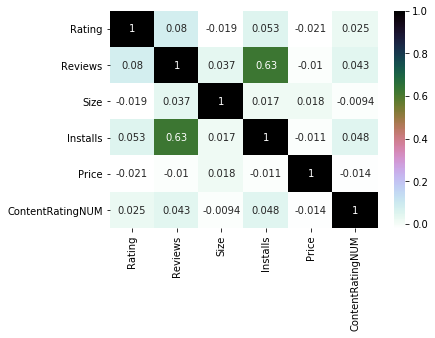

In [58]:
# Heatmap Correlation
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()